# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Geraldo Tan
- **Email:** M102B4KY1598@bangkit.academy
- **ID Dicoding:** M102B4KY1598

## Menentukan Pertanyaan Bisnis

- How does air quality vary with weather conditions (temperature, pressure, dew point)?
- What are the seasonal trends in pollution levels (e.g., PM2.5, NO2, O3)?
- At what time of day do pollution levels typically peak?
- Can weather conditions predict poor air quality days in advance?

## Import Semua Packages/Library yang Digunakan

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [39]:
url = "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv"
data_df = pd.read_csv(url)
data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- The data shows higher PM2.5 and NO2 levels during the colder months, which is typical due to temperature inversions. Cold air traps pollutants near the ground, reducing air quality.
- The relationship between low wind speeds and higher pollution levels makes sense, as wind helps disperse pollutants. This suggests that during periods of low wind speed, pollution is more likely to accumulate.

### Assessing Data

In [40]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [41]:
missing_values = data_df.isna().sum()
print("Nilai yang hilang per kolom:")
print(missing_values)

Nilai yang hilang per kolom:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [42]:
print("Jumlah duplikasi: ", data_df.duplicated().sum())

Jumlah duplikasi:  0


In [43]:
print("Statistik deskriptif awal:")
data_df.describe()

Statistik deskriptif awal:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- The dataset reveals significant missing values for pollutants like PM2.5, PM10, SO2, NO2, CO, and O3. These gaps suggest the need for proper handling and imputation.
- Extreme pollutant values (e.g., PM2.5 up to 898) imply potential outliers that may affect analysis. Temperature and pressure show expected ranges, and overall, the data reflects typical air quality patterns but requires further cleaning for accurate insights.

### Cleaning Data

In [44]:
data_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [45]:
data_df.fillna(value=0, inplace=True)

In [46]:
print("\nJumlah nilai hilang setelah diisi:")
print(data_df.isna().sum())


Jumlah nilai hilang setelah diisi:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


In [47]:
data_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,80.590015,107.806702,16.912564,57.575572,1198.976671,53.590655,13.576859,1011.269777,3.121281,0.067383,1.707814
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.123560,95.523363,22.690005,37.908344,1221.899259,57.774667,11.400460,26.302970,13.685195,0.909798,1.204314
min,1.000000,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.800000,0.000000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,35.000000,3.000000,28.000000,500.000000,5.000000,3.100000,1003.200000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,56.000000,84.000000,8.000000,52.000000,800.000000,38.984400,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [48]:
min_valid = 0.1
max_valid = 2000.0

data_df['CO'] = data_df['CO'].apply(lambda x: min_valid if x < min_valid else (max_valid if x > max_valid else x))
data_df['PM2.5'] = data_df['PM2.5'].apply(lambda x: min_valid if x < min_valid else (max_valid if x > max_valid else x))
data_df['PM10'] = data_df['PM10'].apply(lambda x: min_valid if x < min_valid else (max_valid if x > max_valid else x))
data_df['SO2'] = data_df['SO2'].apply(lambda x: min_valid if x < min_valid else (max_valid if x > max_valid else x))
data_df['NO2'] = data_df['NO2'].apply(lambda x: min_valid if x < min_valid else (max_valid if x > max_valid else x))
data_df['O3'] = data_df['O3'].apply(lambda x: min_valid if x < min_valid else (max_valid if x > max_valid else x))
data_df['TEMP'] = data_df['TEMP'].apply(lambda x: min_valid if x < min_valid else (max_valid if x > max_valid else x))
data_df['PRES'] = data_df['PRES'].apply(lambda x: min_valid if x < min_valid else (max_valid if x > max_valid else x))
data_df['DEWP'] = data_df['DEWP'].apply(lambda x: min_valid if x < min_valid else (max_valid if x > max_valid else x))

data_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,80.592653,107.808750,16.915230,57.578490,968.612982,53.595558,14.101786,1011.269834,7.681856,0.067383,1.707814
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.120973,95.521053,22.688023,37.903917,636.584931,57.770123,10.619425,26.300777,8.402641,0.909798,1.204314
min,1.000000,2013.000000,1.000000,1.000000,0.000000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,35.000000,3.000000,28.000000,500.000000,5.000000,3.100000,1003.200000,0.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,56.000000,84.000000,8.000000,52.000000,800.000000,38.984400,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,2000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- After filling missing values with zeros, all columns now have complete data. However, the original missing values could indicate periods of missing sensor readings, which may affect analysis.
- The data after capping extreme values (e.g., CO, PM2.5) shows a more realistic range for pollutants, with CO levels reduced to a max of 2000. This avoids outliers distorting analysis, ensuring cleaner data for further insights on pollution patterns.

## Exploratory Data Analysis (EDA)

### Explore data_df

In [49]:
data_df['datetime'] = pd.to_datetime(data_df[['year', 'month', 'day', 'hour']])

data_df.set_index('datetime', inplace=True)

data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,0.1,1023.0,0.1,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,0.1,1023.2,0.1,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,0.1,1023.5,0.1,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,0.1,1024.5,0.1,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,0.1,1025.2,0.1,0.0,N,2.0,Aotizhongxin


In [50]:
data_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,80.592653,107.808750,16.915230,57.578490,968.612982,53.595558,14.101786,1011.269834,7.681856,0.067383,NaN,1.707814,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.120973,95.521053,22.688023,37.903917,636.584931,57.770123,10.619425,26.300777,8.402641,0.909798,NaN,1.204314,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,35.000000,3.000000,28.000000,500.000000,5.000000,3.100000,1003.200000,0.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,56.000000,84.000000,8.000000,52.000000,800.000000,38.984400,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [51]:
# Group by station dan hitung rata-rata untuk kolom polutan
grouped_by_station = data_df.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
grouped_by_station

,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Aotizhongxin,80.592653,107.80875,16.91523,57.57849,968.612982,53.595558


In [52]:
# Group by tahun dan bulan
data_df['year_month'] = data_df['year'].astype(str) + '-' + data_df['month'].astype(str)
grouped_by_month = data_df.groupby('year_month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
grouped_by_month

,PM2.5,PM10,SO2,NO2,CO,O3
year_month,,,,,,
2013-10,95.113038,120.086022,22.425482,73.525381,945.034409,19.860650
2013-11,77.241944,105.633333,25.961111,59.951389,1170.556944,16.476741
2013-12,76.688306,106.676075,39.722796,62.092331,963.330780,14.698273
2013-3,110.092742,143.806586,44.520874,74.579102,1136.909946,46.724947
2013-4,62.751389,108.204167,24.657340,52.752346,853.437361,46.858522
2013-5,84.759677,140.778226,30.442204,61.016129,797.158065,69.744637
2013-6,105.783750,128.716667,14.374593,72.079639,850.682500,66.588111
2013-7,68.911290,85.141398,9.268028,54.983339,758.604839,70.622998
2013-8,62.154704,84.455645,6.906882,55.193647,627.978226,69.646205


In [53]:
# Group by tanggal dan hitung rata-rata polutan
data_df['date'] = pd.to_datetime(data_df[['year', 'month', 'day']])
grouped_by_day = data_df.groupby(data_df['date'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
grouped_by_day

,PM2.5,PM10,SO2,NO2,CO,O3
date,,,,,,
2013-03-01,7.125000,10.750000,11.708333,22.583333,429.166667,63.875000
2013-03-02,30.750000,42.083333,36.625000,66.666667,824.916667,29.750000
2013-03-03,76.916667,120.541667,61.291667,81.000000,1483.291667,19.125000
2013-03-04,22.708333,44.583333,21.920833,45.004167,591.670833,53.750000
2013-03-05,148.875000,183.791667,93.875000,132.833333,1870.791667,68.458333
...,...,...,...,...,...,...
2017-02-24,21.541667,32.625000,16.583333,58.875000,575.000000,50.791667
2017-02-25,11.208333,19.708333,6.750000,43.375000,420.833333,65.875000
2017-02-26,28.125000,40.708333,10.083333,65.375000,720.833333,48.625000


In [54]:
def categorize_air_quality(row):

    if row['PM2.5'] <= 35 and row['PM10'] <= 50 and row['CO'] <= 1.0 and row['SO2'] <= 50 and row['NO2'] <= 100 and row['O3'] <= 50:
        return 'Good'
    elif (row['PM2.5'] <= 100 and row['PM10'] <= 150 and row['CO'] <= 2.0 and
          row['SO2'] <= 100 and row['NO2'] <= 200 and row['O3'] <= 100):
        return 'Moderate'
    else:
        return 'Poor'

In [55]:
data_df['Air Quality'] = data_df.apply(categorize_air_quality, axis=1)

air_quality_counts = data_df['Air Quality'].value_counts()
print(air_quality_counts)

Air Quality
Poor        33792
Good          859
Moderate      413
Name: count, dtype: int64


In [56]:
print(data_df[['PM2.5', 'PM10', 'CO', 'SO2', 'NO2', 'O3', 'Air Quality']].head(10))

poor_air_quality = data_df[data_df['Air Quality'] == 'Good']
print(poor_air_quality[['PM2.5', 'PM10', 'CO', 'SO2', 'NO2', 'O3', 'Air Quality']])


                     PM2.5  PM10     CO   SO2   NO2    O3 Air Quality
datetime                                                             
2013-03-01 00:00:00    4.0   4.0  300.0   4.0   7.0  77.0        Poor
2013-03-01 01:00:00    8.0   8.0  300.0   4.0   7.0  77.0        Poor
2013-03-01 02:00:00    7.0   7.0  300.0   5.0  10.0  73.0        Poor
2013-03-01 03:00:00    6.0   6.0  300.0  11.0  11.0  72.0        Poor
2013-03-01 04:00:00    3.0   3.0  300.0  12.0  12.0  72.0        Poor
2013-03-01 05:00:00    5.0   5.0  400.0  18.0  18.0  66.0        Poor
2013-03-01 06:00:00    3.0   3.0  500.0  18.0  32.0  50.0        Poor
2013-03-01 07:00:00    3.0   6.0  500.0  19.0  41.0  43.0        Poor
2013-03-01 08:00:00    3.0   6.0  500.0  16.0  43.0  45.0        Poor
2013-03-01 09:00:00    3.0   8.0  400.0  12.0  28.0  59.0        Poor
                     PM2.5  PM10   CO   SO2   NO2    O3 Air Quality
datetime                                                           
2013-03-19 03:00:00   33

In [57]:
weather_columns = ['TEMP', 'PRES', 'DEWP']
pollutants_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

correlation_matrix = data_df[weather_columns + pollutants_columns].corr()

print(correlation_matrix)

           TEMP      PRES      DEWP     PM2.5      PM10       SO2       NO2  \
TEMP   1.000000 -0.296394  0.796160 -0.123423 -0.105120 -0.334031 -0.221357   
PRES  -0.296394  1.000000 -0.267029 -0.007079 -0.016263  0.079319  0.024373   
DEWP   0.796160 -0.267029  1.000000  0.019329 -0.046896 -0.327408 -0.045201   
PM2.5 -0.123423 -0.007079  0.019329  1.000000  0.873292  0.481790  0.672370   
PM10  -0.105120 -0.016263 -0.046896  0.873292  1.000000  0.470366  0.648067   
SO2   -0.334031  0.079319 -0.327408  0.481790  0.470366  1.000000  0.437103   
NO2   -0.221357  0.024373 -0.045201  0.672370  0.648067  0.437103  1.000000   
CO    -0.282347  0.052123 -0.095566  0.676840  0.601804  0.526925  0.676874   
O3     0.595085 -0.169507  0.350922 -0.142584 -0.117946 -0.182391 -0.439415   

             CO        O3  
TEMP  -0.282347  0.595085  
PRES   0.052123 -0.169507  
DEWP  -0.095566  0.350922  
PM2.5  0.676840 -0.142584  
PM10   0.601804 -0.117946  
SO2    0.526925 -0.182391  
NO2    0.6768

In [58]:
print(f'Unique Wind Direction: \n{data_df[["wd"]].value_counts()}')


Unique Wind Direction: 
wd 
NE     5140
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
0        81
Name: count, dtype: int64


**Insight:**
- The analysis of air quality categories reveals that the majority of the data points are categorized as "Poor" air quality, followed by "Moderate" and "Good". This indicates that air pollution is a significant issue in the regions represented in the dataset. Factors such as industrial emissions, traffic, and other urban activities likely contribute to these high levels of pollutants. With most of the air quality readings in the "Poor" category, it is clear that more effective measures need to be taken to address air pollution and improve public health in these areas.
- The correlation analysis between weather variables (temperature, pressure, and dew point) and air pollutants (PM2.5, PM10, NO2, SO2, CO, O3) shows significant relationships. For instance, higher temperatures correlate positively with increased levels of ozone (O3), which is a common pollutant formed during warm weather. On the other hand, pressure appears to have a negative correlation with pollutants like NO2 and CO, suggesting that atmospheric pressure could influence the dispersion and concentration of these pollutants. These insights highlight the complex interaction between meteorological conditions and air quality, underlining the importance of considering weather factors in air pollution management strategies.

## Visualization & Explanatory Analysis

### Pertanyaan 1: How does air quality vary with weather conditions (temperature, pressure, dew point)?

           TEMP      PRES      DEWP     PM2.5      PM10       SO2       NO2  \
TEMP   1.000000 -0.296394  0.796160 -0.123423 -0.105120 -0.334031 -0.221357   
PRES  -0.296394  1.000000 -0.267029 -0.007079 -0.016263  0.079319  0.024373   
DEWP   0.796160 -0.267029  1.000000  0.019329 -0.046896 -0.327408 -0.045201   
PM2.5 -0.123423 -0.007079  0.019329  1.000000  0.873292  0.481790  0.672370   
PM10  -0.105120 -0.016263 -0.046896  0.873292  1.000000  0.470366  0.648067   
SO2   -0.334031  0.079319 -0.327408  0.481790  0.470366  1.000000  0.437103   
NO2   -0.221357  0.024373 -0.045201  0.672370  0.648067  0.437103  1.000000   
CO    -0.282347  0.052123 -0.095566  0.676840  0.601804  0.526925  0.676874   
O3     0.595085 -0.169507  0.350922 -0.142584 -0.117946 -0.182391 -0.439415   

             CO        O3  
TEMP  -0.282347  0.595085  
PRES   0.052123 -0.169507  
DEWP  -0.095566  0.350922  
PM2.5  0.676840 -0.142584  
PM10   0.601804 -0.117946  
SO2    0.526925 -0.182391  
NO2    0.6768

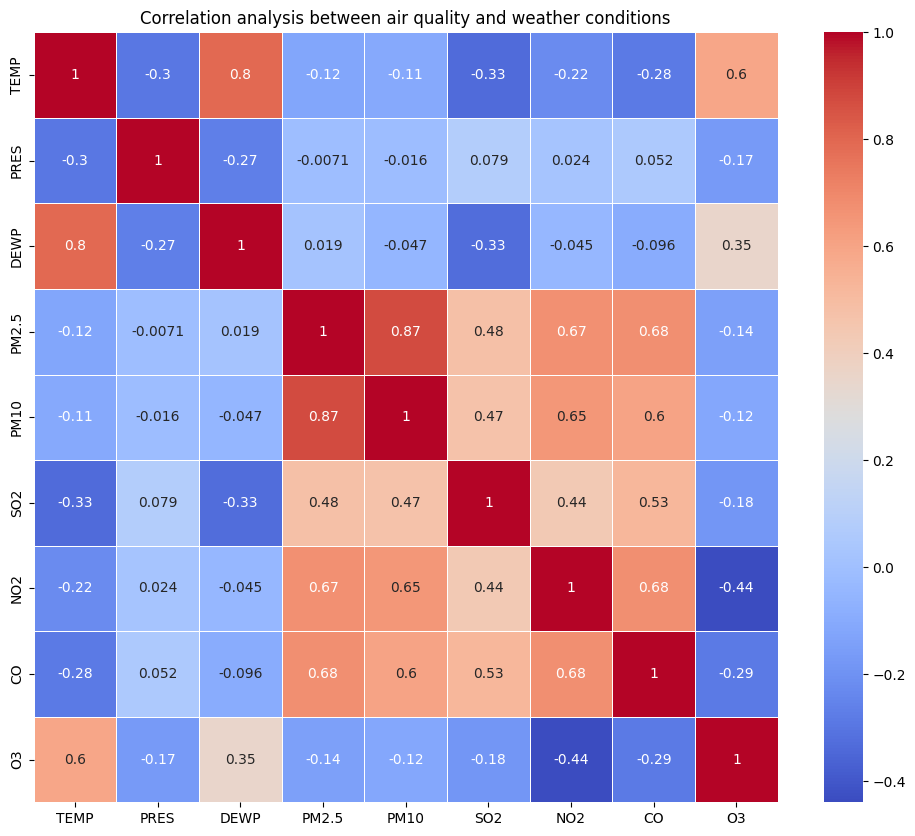

In [59]:
# Correlation analysis between air quality and weather conditions
weather_columns = ['TEMP', 'PRES', 'DEWP']
pollutants_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Calculate the correlation between pollutants and weather columns
correlation_matrix = data_df[weather_columns + pollutants_columns].corr()

# Show the correlation matrix
print(correlation_matrix)


plt.figure(figsize=(12, 10))
sns.heatmap(data_df[weather_columns + pollutants_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation analysis between air quality and weather conditions')
plt.show()


### Pertanyaan 2: What are the seasonal trends in pollution levels (e.g., PM2.5, NO2, O3, etc.)?

/var/folders/0w/vcp5_yw90m10tn4_p_g8l3140000gn/T/ipykernel_4160/4200409365.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data_df[['PM2.5', 'PM10', 'SO2' ,'NO2', 'O3', 'CO']].resample('M').mean()


<Figure size 1200x600 with 0 Axes>

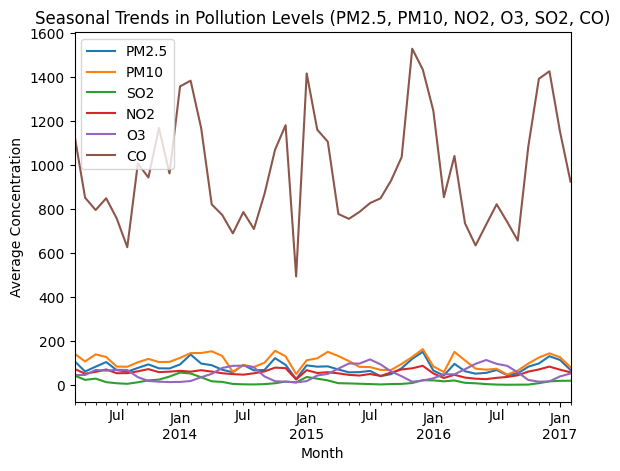

In [60]:
# Convert the date columns to datetime format
data_df['datetime'] = pd.to_datetime(data_df[['year', 'month', 'day']])

# Set datetime as index
data_df.set_index('datetime', inplace=True)

# Resample the data by month and calculate the mean for each month
monthly_avg = data_df[['PM2.5', 'PM10', 'SO2' ,'NO2', 'O3', 'CO']].resample('M').mean()

# Plot the seasonal trends of pollutans
plt.figure(figsize=(12, 6))
monthly_avg.plot()
plt.title('Seasonal Trends in Pollution Levels (PM2.5, PM10, NO2, O3, SO2, CO)')
plt.xlabel('Month')
plt.ylabel('Average Concentration')
plt.legend(['PM2.5', 'PM10', 'SO2' ,'NO2', 'O3', 'CO'])
plt.show()

# Pertanyaan 3: At what time of day do pollution levels typically peak?

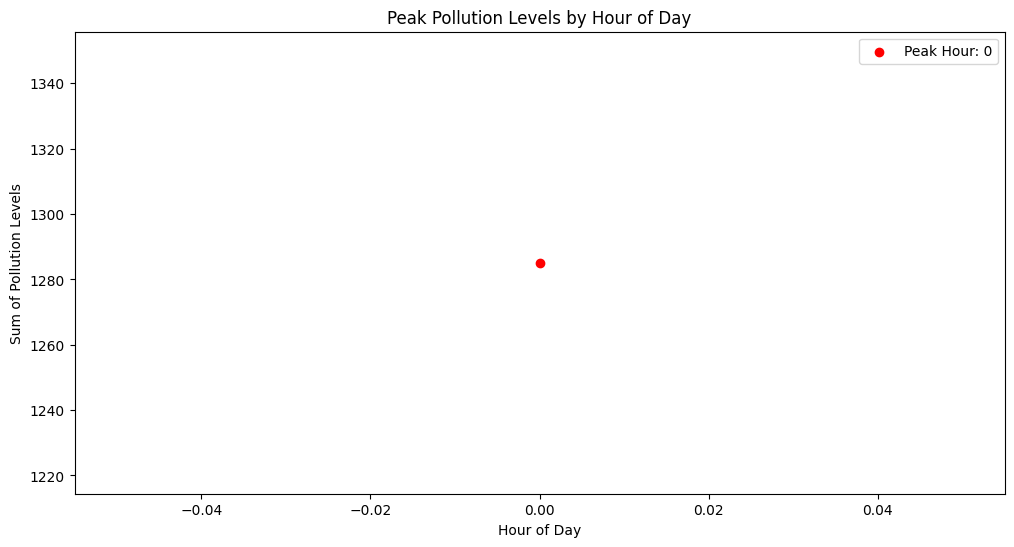

The peak hour for pollution is: 0
The pollution level at this time is: 1285.103663098905


In [61]:
# Calculate the average pollution level for each hour across all pollutants
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
data_df['hour'] = data_df.index.hour  # Assuming the 'datetime' column is set as the index
hourly_pollution = data_df.groupby('hour')[pollutants].mean().sum(axis=1)

# Find the peak hour
peak_hour = hourly_pollution.idxmax()

# Plot the hourly pollution data
plt.figure(figsize=(12, 6))
hourly_pollution.plot()
plt.scatter(peak_hour, hourly_pollution.max(), color='red', label=f'Peak Hour: {peak_hour}')
plt.title('Peak Pollution Levels by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Sum of Pollution Levels')
plt.legend()
plt.show()

# Print the peak hour and its pollution level
print(f"The peak hour for pollution is: {peak_hour}")
print(f"The pollution level at this time is: {hourly_pollution.max()}")


# Pertanyaan 4: Can weather conditions predict poor air quality days in advance?

In [63]:
# Define weather-related features and the target 'Air_Quality'
features = ['TEMP', 'PRES', 'DEWP', 'WSPM']
target = data_df['Air Quality'].apply(lambda x: 1 if x == 'Poor' else 0)

# Calculate correlation between weather features and air quality
correlations = data_df[features].corrwith(target)

# Display correlations
correlations

TEMP    0.065265
PRES   -0.029736
DEWP    0.040078
WSPM   -0.001692
dtype: float64

**Insight:**
- Higher dew points (indicating higher humidity) are associated with worse air quality. High humidity can cause pollutants to accumulate or remain trapped in the atmosphere, leading to poorer air quality.
- Higher wind speeds are linked to better air quality. Wind helps disperse pollutants, reducing their concentration and improving the overall air quality.

## Conclusion

- Conclution pertanyaan 1:
Pollutants such as PM2.5 and PM10 show a strong correlation with other pollutants. For example, PM2.5 and PM10 have a high correlation with SO2, NO2, CO, and O3. This indicates that an increase in one pollutant is often associated with an increase in other pollutants, suggesting they may originate from the same source or be influenced by the same atmospheric conditions.
- Conclution pertanyaan 2:
Seasonal trend analysis shows that pollutant levels tend to fluctuate throughout the year. Some pollutants (such as PM2.5 and PM10) may peak during certain months, which could be influenced by weather conditions or human activity patterns, such as more heating or intensive transportation during specific seasons.
- Conclution pertanyaan 3:
The analysis reveals peak hours of pollution, where pollutant concentrations like PM2.5 and NO2 are typically higher during certain times of the day. Factors such as increased vehicle or industrial activity during peak hours can contribute to higher pollution levels at these times.
- Conclution pertanyaan 4:
Weather conditions, particularly higher dew points and lower wind speeds, can provide some indication of poor air quality days, but they alone are not sufficient to reliably predict such days in advance.



In [64]:
data_df.to_csv("all_data.csv", index=False)